<a href="https://colab.research.google.com/github/jasmencoelho/Jasmen_Coelho_Portfolio/blob/main/Segmentation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Segmentation

In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()

## Connect your dataset to the notebook

dataset = [Semantic segmentation of aerial imagery](https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery)

In [ ]:
dataset_root_folder= '/content/drive/MyDrive/data'

In [ ]:
dataset_name = 'Semantic segmentation dataset'

In [ ]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):
        #print(image_name)
        a = True

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

## Processing Images and Masks

In [ ]:
image_dataset = []
mask_dataset = []
image_patch_size = 256   # Size of patches into which the image is divided.

for image_type in ['images', 'masks']:
  if image_type == 'images': # Determine file extensions
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20): #loops iterate through different tiles (1 to 7) and images (1 to 19) within each tile
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1) # read in each file

      if image is not None: #Verifies if the image was loaded correctly

        if image_type == 'masks':
          #Convert mask to R G B
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #Get new size for x and y
        size_x = (image.shape[1]//image_patch_size)*image_patch_size # "rounds down" the image dimensions to the nearest multiple of image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{}, {}, {}".format(image.shape,size_x, size_y))

        #Convert numpy array into an image for cropping
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x,size_y)) # crop to new dimesnsions, (0,0) is top right, (size_x,size_y) is bottom left
        #print("({}, {})".format(image.size[0], image.size[1]))

        # Convert back into an array
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size) # Image, size of patches to create (256 x 256), 3 channels for R G B,
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):

            if image_type == 'images':
              """
              1. Look at a single patch
              2. Get the shape of the patch (256, 256, 3)
              3. Get the number of channels (patch_0.shape[-1]) aka 3 for RGB
              4. Flatten the patch array (collapse height and width, maintain the channel)
              5. Apply minmaxscaler.fit_transform to put all the values between 0 and 1
              6. reshape the patch to its original shape
              """
              ind_patched_img = patched_images[i,j,:,:]
              #print(ind_patched_img.shape)
              ind_patched_img = minmaxscaler.fit_transform(ind_patched_img.reshape(-1, ind_patched_img.shape[-1])).reshape(ind_patched_img.shape)
              ind_patched_img = ind_patched_img[0]
              #print(ind_patched_img.shape)
              image_dataset.append(ind_patched_img)

            elif image_type == 'masks':
              ind_patched_mask = patched_images[i,j,:,:]
              ind_patched_mask = ind_patched_mask[0]
              mask_dataset.append(ind_patched_mask)


In [ ]:
patch_0 = patched_images[0,0,:,:] # First patch in patched_images
patch_0 .shape # (256, 256, 3)
patch_0.shape[-1] # Number of Channels (RGB)
h_w_collapse = patch_0.reshape(-1, patch_0.shape[-1]) # collapse the height and width dimensions into a single dimension, maintain channels
patch_0_transform = minmaxscaler.fit_transform(h_w_collapse) # Transform all the data to sit between 0 and 1
patch_0 = patch_0_transform.reshape(patch_0.shape) # Reshape back to (256, 256, 3)

In [ ]:
len(mask_dataset)

945

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

## Plot Random Image and Mask Pair

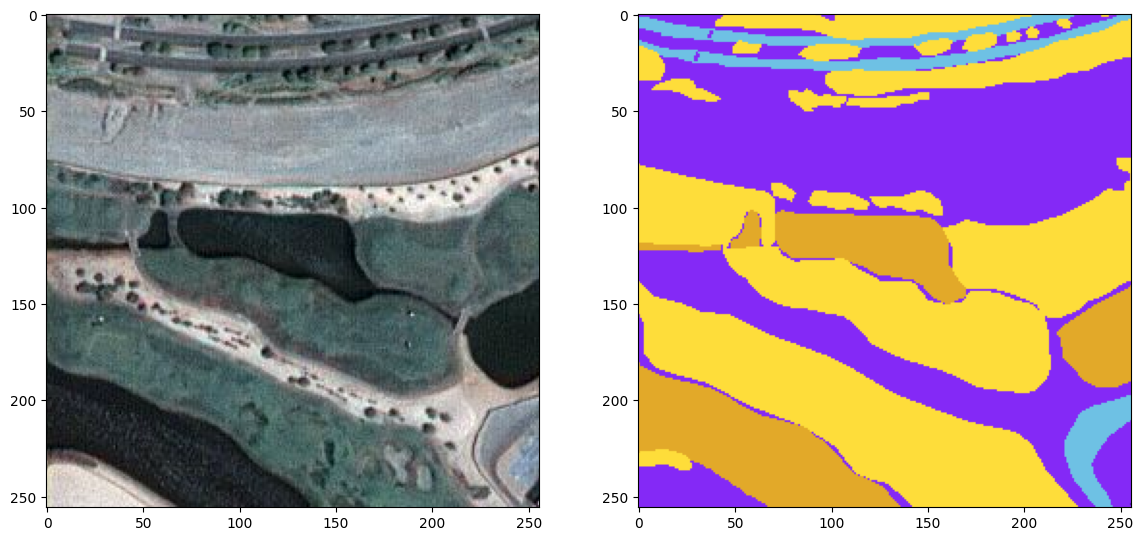

In [ ]:
random_img_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_img_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_img_id])

## One Hot Encoding for labels
Reference the JSON file

In [ ]:
# Example
hex1 = '#8429F6'
print("Hex Color Code:")
print(hex1)
print()
print("Remove Hash:")
hex1 = hex1.lstrip('#')
print(hex1)
print()
print("Seperate each R G B value:")
print("R: ",hex1[0:0 + 2])
print("G: ",hex1[2:2 + 2])
print("B: ",hex1[4:4 + 2])
print()
print("Convert each value into a hexcidecimal")
print("R: ",int(hex1[0:0 + 2], 16))
print("G: ",int(hex1[2:2 + 2], 16))
print("B: ",int(hex1[4:4 + 2], 16))
print()
print("Make it a tuple array: ")
hex1_conversion = np.array(tuple(int(hex1[i:i + 2], 16) for i in (0, 2, 4)))
print(hex1_conversion)



Hex Color Code:
#8429F6

Remove Hash:
8429F6

Seperate each R G B value:
R:  84
G:  29
B:  F6

Convert each value into a hexcidecimal
R:  132
G:  41
B:  246

Make it a tuple array: 
[132  41 246]


In [ ]:
hex_codes = ['#3C1098', '#8429F6', '#6EC1E4', '#FEDD3A', '#E2A929', '#9B9B9B']

def process_labels(hexcode):
    """convert hexadecimal color codes into their respective RGB values in a NumPy array format"""
    class_code = hexcode.lstrip('#') # get rid of hash
    return np.array(tuple(int(class_code[i:i + 2], 16) for i in (0, 2, 4)))

# Create a dictionary to store processed codes with their names
classes = {}
for i, hex_code in enumerate(hex_codes):
    class_name = f"class_{['building', 'land', 'road', 'veg', 'water', 'unlabeled'][i]}"
    classes[class_name] = process_labels(hex_code)

# Print the dictionary to see the stored values
print(classes)

{'class_building': array([ 60,  16, 152]), 'class_land': array([132,  41, 246]), 'class_road': array([110, 193, 228]), 'class_veg': array([254, 221,  58]), 'class_water': array([226, 169,  41]), 'class_unlabeled': array([155, 155, 155])}


In [ ]:
# Assign Variables
class_building = classes['class_building']
class_land = classes['class_land']
class_road = classes['class_road']
class_veg = classes['class_veg']
class_water = classes['class_water']
class_unlabeled = classes['class_unlabeled']

In [ ]:
class_land

array([132,  41, 246])

In [ ]:
def rgb_to_label(label):
  """Converts RGB-labeled mask into a segmented label representation where each segment represents a specific class"""
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_veg, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:

labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [ ]:
labels = np.expand_dims(labels, axis = 3)

## Plotting Original Mask with One Hot Encoded Mask

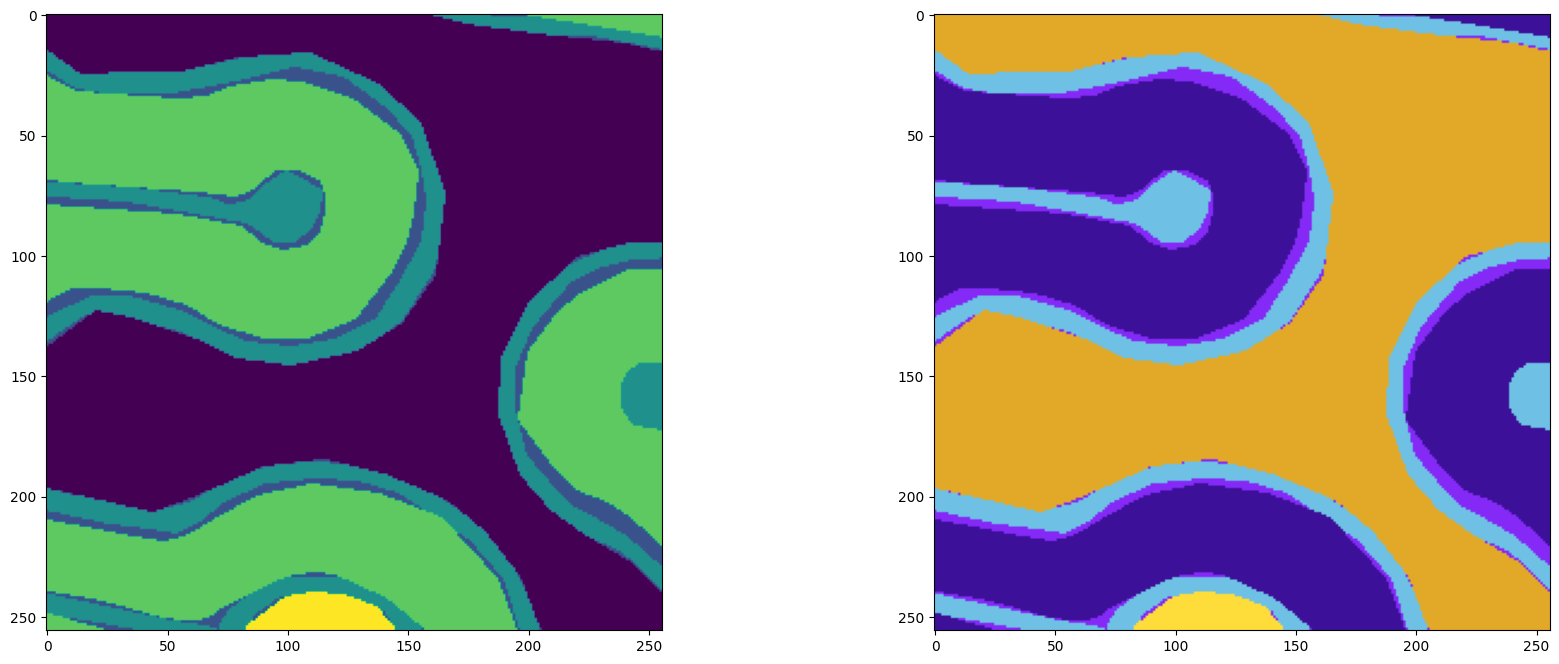

In [ ]:
random_img_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(21,8))
plt.subplot(121)
plt.imshow(labels[random_img_id][:,:,0]) # label encoded
plt.subplot(122)
plt.imshow(mask_dataset[random_img_id]) # label not encoded


In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
master_training_dataset = image_dataset

## Split the training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test =  train_test_split(master_training_dataset, labels_categorical_dataset, test_size = 0.15, random_state=100 )

In [ ]:
img_height = X_train.shape[0]
img_width = X_train.shape[1]
img_channels = X_train.shape[2]
total_classes = y_train.shape[3]

## Training and Prediction Overview

- U-Net: Neural Network
- Create a U Net model
- Load our model to netron to validate our model
- Add the Jaccard Index Model Evaluation Metrics
- Add a Loss Function (Focal Loss, Cross Entropy Loss Extension)
- Compile Model
- Perform Training
- Get Metrics
- Perform a Prediction
- Add Diagnostics (plot loss after each EPOCH)
- Download our model
- Deploy our Model (next steps)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K
# tensor label calculation (deep mathematics) is through the backend which is default tensorflow

In [ ]:
# First we are going to set up our evaluation metrics. IoU = Overlap/Union (Jaccard Index)

## Set up your Evaluation Metric (Jaccard Index)

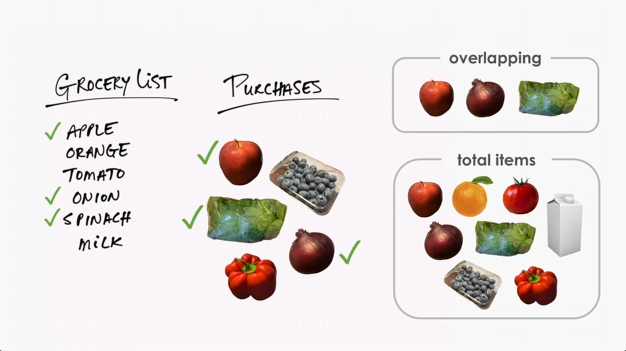

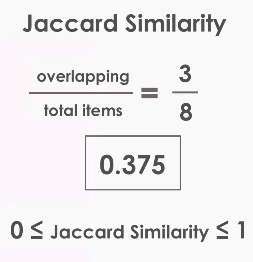

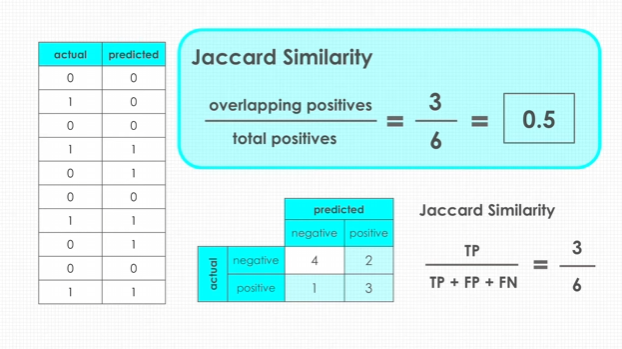

In [ ]:
def jaccard_coef(y_true,y_pred):
  # flatten the y_true and y_pred
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  # get the intersection
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  # Intersection / True Positive, False Positive, Subtract False Negative
  final_coeff_value = intersection + 1.0 / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

## Build U-Net Model

1. Encoding the Image: Take the image and break it down into smaller pieces
2. Feature Extraction: Begin understanding edges, textures, shapes (details)
3. Decoding and Reconstruction: Take all the details and put it back together again.
4. Skip connections: Use the big picture information with the detailed information for a more complete understanding
5. Output: Segmented Image
6. Compare predicted and actual values with Jaccard Index
7. Feedback Signal: Model adjusts its internal parameters to increase the Jaccard Index

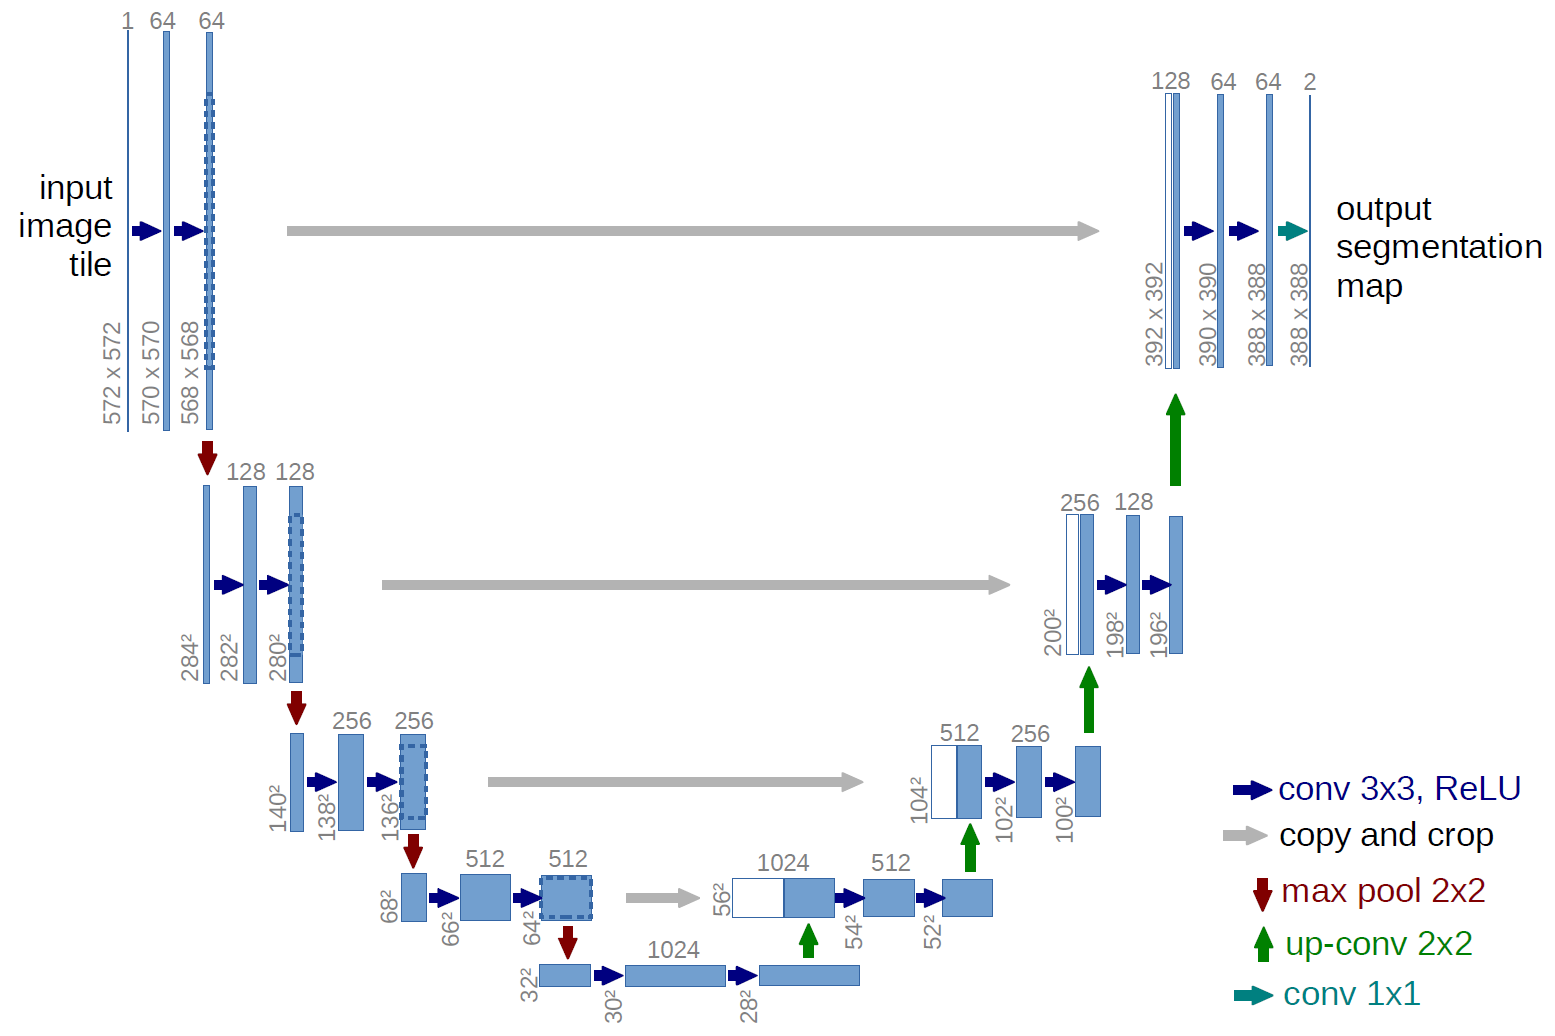

In [ ]:
def multi_unet_model(n_classes = 5, img_height = 256, img_width=256, img_channels=1):
  # Define your input
  input = Input((img_height, img_width, img_channels))

  source_input = input
  # ------------------------------ FIRST BLOCK -------------------------------------------------------
  # Create the Convolutionary 2D layer for U Net Model 3x3 relu
  c1 = Conv2D(filter = 16, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)

  # Set up the Dropout to randomly deactivate 20% of the neurons to prevent overfitting (you can play around with this value)
  c1 = Dropout(0.2)(c1)

  # Do another Convolution
  c1 = Conv2D(filter = 16, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)

  # Max Pooling: Reduce the spatial dims of an input feature map.
  p1 = MaxPooling2D((2,2))(c1)

  # -------------------------------SECOND BLOCK -------------------------------------------------------
  # Double the filter, use p1 as the input, filter goes from 16 to 32.
  c2 = Conv2D(filter = 32, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(filter = 32, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  # -------------------------------THIRD BLOCK -------------------------------------------------------
  # Double the filter, use p2 as the input, filter goes from 32 to 64.
  c3 = Conv2D(filter = 64, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(filter = 64, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  # -------------------------------FOURTH BLOCK -------------------------------------------------------
  # Double the filter, use p3 as the input, filter goes from 64 to 128.
  c4 = Conv2D(filter = 128, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(filter = 128, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  # -------------------------------FIFTH BLOCK -------------------------------------------------------
  # Double the filter, use p4 as the input, filter goes from 128 to 254.
  c5 = Conv2D(filter = 256, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(filter = 256, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)
  # Now we will start the up conversion

  # -------------------------------SIXTH BLOCK -------------------------------------------------------
  # We are using the up conversion 2x2, and reducing the filter each block
  u6 = Conv2DTranspose(128, (2,2), stride = (2,2), padding = "same")(c5)
  u6 = concatenate([u6, c4]) # Skip Connection
  c6 = Conv2D(filter = 128, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(filter = 128, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  # -------------------------------SEVENTH BLOCK -------------------------------------------------------
  u7 = Conv2DTranspose(64, (2,2), stride = (2,2), padding = "same")(c6)
  u7 = concatenate([u7, c3]) # Skip Connection
  c7 = Conv2D(filter = 64, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(filter = 64, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  # -------------------------------EIGHTH BLOCK -------------------------------------------------------
  u8 = Conv2DTranspose(32, (2,2), stride = (2,2), padding = "same")(c7)
  u8 = concatenate([u8, c2]) # Skip Connection
  c8 = Conv2D(filter = 32, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(filter = 32, kernal_size= (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)
